In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [24]:
#
df = pd.read_csv("dog_horse.csv")
# to delete the first column 
df = df.iloc[:, 1:5]

In [25]:
# train & test 
target = "type"
# delete the target 
X = df.drop(target, axis=1)
# assign it here 
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8, 
    random_state=42)

In [26]:
#besline
df["type"].value_counts(normalize=True)

horse    0.5
dog      0.5
Name: type, dtype: float64

In [40]:
#decision_tree
dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
#we can calculate the accuarcy using score
dt.score(X_train,y_train)

1.0

In [42]:
# for the test 
dt.score(X_test,y_test)

1.0

In [47]:
param_grid = {
    "criterion": ['entropy', 'gini'],
    'max_depth':[1,2,3,4,5]
}


grid = GridSearchCV(dt, # Model
                    param_grid=param_grid, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=1, # Shows output while training 
                    n_jobs=-1, # How many core to use on your computer (-1 means use all cores)
                    scoring="accuracy"
                   )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [48]:
#Best Parameters
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [51]:
# train with the best estimator
preds = grid.best_estimator_.predict(X_train)

print(classification_report(y_train, preds))

              precision    recall  f1-score   support

         dog       1.00      1.00      1.00        79
       horse       1.00      1.00      1.00        81

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [52]:
# test with the best estimator
preds = grid.best_estimator_.predict(X_test)

In [53]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         dog       1.00      1.00      1.00        21
       horse       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



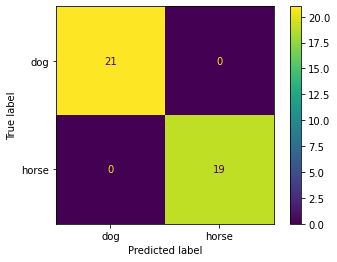

In [57]:
#we can also make a simple confusion matrix
plot_confusion_matrix(grid.best_estimator_, X_test, y_test);

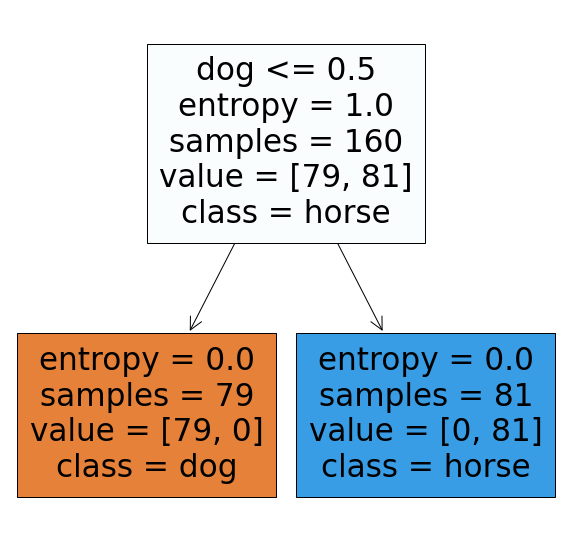

In [74]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    grid.best_estimator_, 
    filled=True,
#    rounded=True,
    feature_names= y_train, # columns in same order as was trained on
    class_names=[str(x) for x in grid.best_estimator_.classes_]
) ;# use grid.best_estimator_.classes_to find class order